In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/..')

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

from utils.causal_graph import CausalGraph

# Some basic graphs and dynamics
**Dynamics** as in activations from steps (deterministic), and random walks

- What kind of graph gives scale free random walk p distr?
- How do firing patterns differ given input?
- Take fft, pca of "spikes"

## Resources
- [NetworkX generators](https://networkx.org/documentation/stable/reference/generated/networkx.generators.community.gaussian_random_partition_graph.html)

# Periodic tiling

square

/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


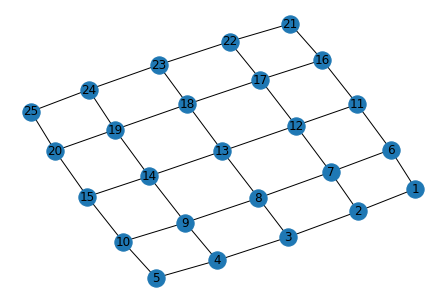

In [27]:
def make_lattice(l,w):
    """Left to right method"""
    edges = []
    for i in range(l*w+1): # add one for final node to pass second statement
        if (i%w) != 0:
            edges.append((i, i+1))
        if i-w > 0: #if i > w:
            edges.append((i,i-w))
                
    return edges
ed = make_lattice(5,5)
G = nx.Graph(ed)
nx.draw(G, with_labels=True)

In [11]:
x=[1,2,3]
x.extend([123,4])
x


[1, 2, 3, 123, 4]

[]

# Spider graph

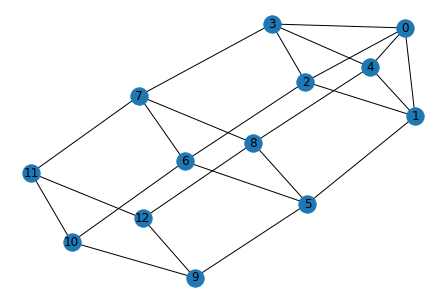

In [63]:
def spider_graph(s,r):
    """spokes and radius"""
    edges = [(0, n) for n in range(1,s+1)] #start with spoke
    
    def diam_growth(curr):
        edges.extend([(rv, rv+1) for rv in range(curr-s+1, curr)]) # incremental radial nodes
        edges.append((curr, curr-s+1))
        
    for i in range(1,r*s+1): # r*s total nodes (excluding center)
        ## radial growth
        edges.append((i,i+s)) 
        ## diametrical growth
        if i % s == 0:
            diam_growth(i) #closing the current cycle
        if i == r*s: #final cycle
            diam_growth(i+s)
    return edges

ed = spider_graph(4,2)
G = nx.Graph(ed)
nx.draw(G, with_labels=True)# node_color='k', node_size=1

In [74]:
import random


edges2sets = lambda ed: [set(e) for e in ed]
set2int = lambda s: list(s)[0]
int2bit = lambda i: i%2 # bipartite graph node label conversion
nx2list = lambda G: list(G.edges)
def random_graph_walk(g, t0, t, binary=True):
    """
    g: graph
    t0: init node
    t: num time steps
    """
    curr = t0
    visited = [t0]
    for i in range(t):
        search = True
        while search: #search for rand neighbor node
            edge = random.choice(g)
            if curr in edge:
#                 print('>>>>>>>>>>>STOP', curr, edge)
                
                search = False
                curr = set2int(edge ^ {curr}) # the item that's not the current edge
        visited.append(curr)
    return visited

nodes = random_graph_walk(edges2sets(ed), 8, 100000)

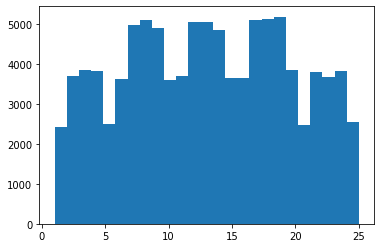

In [57]:
bnodes = list(map(int2bit, nodes))
plt.hist(nodes,bins=25); plt.show()

In [106]:
int(b'10')

10

In [104]:
format(ord('b'), 'b').zfill(8)

'01100010'

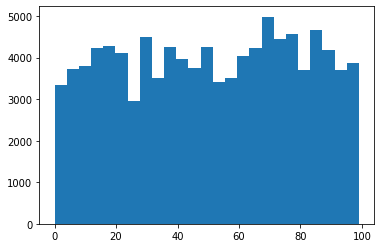

In [93]:
nodes = random_graph_walk(edges2sets(nx2list(G_gau)), 2, 100000)
plt.hist(nodes,bins=25); plt.show()

In [13]:
scale_free = nx.scale_free_graph(100)

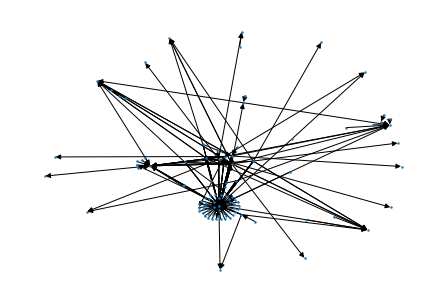

In [10]:
nx.draw(scale_free, node_size=2)

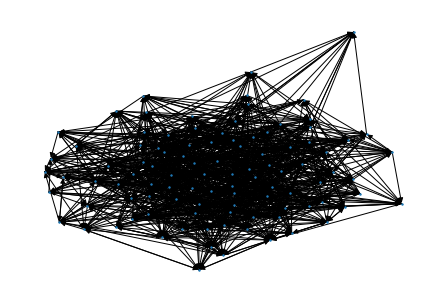

In [70]:
G_gau = nx.gaussian_random_partition_graph(100, 10, 10, 0.25, 0.1)
nx.draw(G_gau, node_size=2)

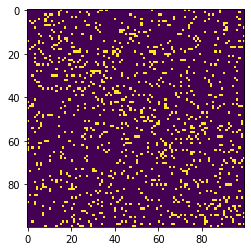

In [78]:
plt.imshow(nx.adjacency_matrix(G).todense())

In [ ]:
np.linalg.matrix_power(nx.adjacency_matrix(G), 5)

In [ ]:
cg = CausalGraph(G)
r_ix = 30
init = np.zeros(1000)
init[r_ix] = 1
raster = cg.simulate(init, 10)
raster

# Penrose graph

Interesting sequences from random walks?

- really the dual of the penrose planar tiling
- but also consider the dual's dual 

In [ ]:
for i in range(100): # 100 nodes?
    